# ANÁLISIS EXPLORATORIO

# Importación de los datos
Vemos los primeros registros del dataset y los tipos de variables

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
salaries = pd.read_csv("2017-18_NBA_salary.csv")
print(salaries.head(15))
print(salaries.dtypes)

                 Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm   G  \
0               Zhou Qi    815615       China               43   22  HOU  16   
1         Zaza Pachulia   3477600     Georgia               42   33  GSW  66   
2         Zach Randolph  12307692         USA               19   36  SAC  59   
3           Zach LaVine   3202217         USA               13   22  CHI  24   
4          Zach Collins   3057240         USA               10   20  POR  62   
5          Yogi Ferrell   1312611         USA               62   24  DAL  79   
6          Xavier Silas     74159         USA               62   30  BOS   2   
7   Xavier Rathan-Mayes     46080      Canada               62   23  MEM   5   
8       Wilson Chandler  12016854         USA               23   30  DEN  70   
9     Willy Hernangomez   1435750       Spain               35   23  TOT  45   
10          Willie Reed   1577230         USA               62   27  TOT  42   
11  Willie Cauley-Stein   3704160       

# Calidad de los datos
Veremos si hay datos con valores faltantes o si hay filas repetidas

In [21]:
print(salaries.isna().sum())
print("Número de filas repetidas:", salaries.size-salaries.drop_duplicates().size)

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                2
3PAr               2
FTr                2
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               2
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
dtype: int64
Número de filas repetidas: 0


# Resumen estadístico
Veremos un resumen de estadísticas descriptivas

In [25]:
print(salaries.select_dtypes(include="object").describe(include="all"))
print(salaries.describe())

            Player NBA_Country   Tm
count          485         485  485
unique         483          44   31
top     Kay Felder         USA  TOT
freq             3         374   55
           Salary  NBA_DraftNumber    Age      G      MP    PER    TS%   3PAr  \
count      485.00           485.00 485.00 485.00  485.00 485.00 483.00 483.00   
mean   6636507.50            29.45  26.26  50.17 1154.14  13.26   0.54   0.34   
std    7392601.91            21.13   4.27  24.87  811.36   8.77   0.11   0.23   
min      46080.00             1.00  19.00   1.00    1.00 -41.10   0.00   0.00   
25%    1471382.00            11.00  23.00  29.00  381.00   9.80   0.51   0.17   
50%    3202217.00            25.00  26.00  59.00 1134.00  13.20   0.55   0.35   
75%   10000000.00            47.00  29.00  71.00 1819.00  16.50   0.58   0.48   
max   34682550.00            62.00  41.00  79.00 2898.00 134.10   1.50   1.00   

         FTr   ORB%  ...   TOV%   USG%    OWS    DWS     WS  WS/48   OBPM  \
count 483.00 

&lt;matplotlib.collections.PathCollection at 0x1f18516a208&gt;

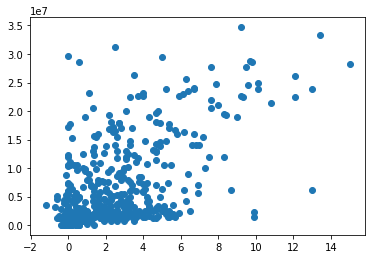

In [35]:
salaries.corr()["Salary"].sort_values(ascending=False)
plt.scatter(salaries["WS"], salaries["Salary"])

         TS%   ORB%   DRB%   TRB%   AST%   STL%   BLK%   TOV%   USG%
count 483.00 485.00 485.00 485.00 485.00 485.00 485.00 483.00 485.00
mean    0.54   4.87  14.95   9.91  12.95   1.53   1.71  13.14  18.90
std     0.11   4.58   6.85   4.96   9.11   0.99   1.68   6.12   5.94
min     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
25%     0.51   1.80  10.20   6.20   6.90   1.00   0.60   9.90  15.00
50%     0.55   3.20  14.00   8.70   9.90   1.50   1.20  12.50  17.90
75%     0.58   7.00  18.80  13.30  17.60   1.90   2.20  15.75  22.20
max     1.50  35.90  37.60  26.50  49.40  12.50  13.40  66.70  45.10


,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
142,Naz Mitrou-Long,92160,Canada,62,24,UTA,1,1,134.10,1.50,...,0.00,45.10,0.10,0.00,0.10,2.71,68.70,-14.30,54.40,0.00


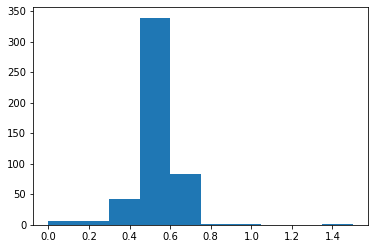

In [27]:
salaries.sort_values(by=["PER"], ascending=False)
perc = list(filter(lambda x: x.endswith("%"), salaries.keys()))
print(salaries[perc].describe())
plt.hist(salaries[perc[0]])
salaries[salaries["TS%"]==1.5]
